In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import csv
import string
import requests
import io
from zipfile import ZipFile
from tensorflow.contrib import learn
from sklearn.model_selection import train_test_split
from tensorflow.python.framework import ops
import warnings
import random
import os

In [3]:
sess = tf.Session()

In [4]:
save_file_name = os.path.join('C:/Users/Test.PPMUMCPU0034/Desktop/Predictive Analytics/Section 6/temp','temp_spam_data.csv')

if not os.path.exists('C:/Users/Test.PPMUMCPU0034/Desktop/Predictive Analytics/Section 6/temp'):
    os.makedirs('C:/Users/Test.PPMUMCPU0034/Desktop/Predictive Analytics/Section 6/temp')

if os.path.isfile(save_file_name):
    text_data = []
    with open(save_file_name, 'r') as temp_output_file:
        reader = csv.reader(temp_output_file)
        for row in reader:
            text_data.append(row)
else:
    zip_url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/00228/smsspamcollection.zip'
    r = requests.get(zip_url)
    z = ZipFile(io.BytesIO(r.content))
    file = z.read('SMSSpamCollection')

    text_data = file.decode()
    text_data = text_data.encode('ascii',errors='ignore')
    text_data = text_data.decode().split('\n')
    text_data = [x.split('\t') for x in text_data if len(x)>=1]

    with open(save_file_name, 'w') as temp_output_file:
        writer = csv.writer(temp_output_file)
        writer.writerows(text_data)


In [5]:
texts = [x[1] for x in text_data]
target = [x[0] for x in text_data]

target = [1 if x=='spam' else 0 for x in target]
texts = [x.lower() for x in texts]
texts = [''.join(c for c in x if c not in string.punctuation) for x in texts]
texts = [''.join(c for c in x if c not in '0123456789') for x in texts]
texts = [' '.join(x.split()) for x in texts]

text_lengths = [len(x.split()) for x in texts]
text_lengths = [x for x in text_lengths if x < 50]

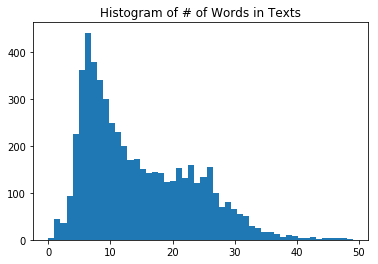

In [6]:
plt.hist(text_lengths, bins=50)
plt.title('Histogram of # of Words in Texts')  
plt.show()

In [7]:
text_size = 25
min_word_freq = 3

In [8]:
vocab_processor = learn.preprocessing.VocabularyProcessor(text_size, min_frequency=min_word_freq)

Instructions for updating:
Please use tensorflow/transform or tf.data.
Instructions for updating:
Please use tensorflow/transform or tf.data.


In [9]:
embed_vocab = vocab_processor.fit_transform(texts)

Instructions for updating:
Please use tensorflow/transform or tf.data.


In [10]:
embedding_size = len(vocab_processor.vocabulary_)

In [11]:
train_indices = np.random.choice(len(texts),round(len(texts)*0.75), replace=False)
test_indices = np.array(list(set(range(len(texts))) - set(train_indices)))

In [12]:
texts_train, texts_test, target_train, target_test = train_test_split(texts, target, train_size = 0.75)

In [13]:
identity_mat = tf.diag(tf.ones(shape=[embedding_size]))

In [14]:
A = tf.Variable(tf.random_normal(shape=[embedding_size,1]))
b = tf.Variable(tf.random_normal(shape=[1,1]))

In [15]:
x_data = tf.placeholder(shape=[text_size], dtype=tf.int32)
y_target = tf.placeholder(shape=[1, 1], dtype=tf.float32)

In [16]:
x_embed = tf.nn.embedding_lookup(identity_mat, x_data)
x_sums = tf.reduce_sum(x_embed, 0)

In [17]:
x_sums_2D = tf.expand_dims(x_sums, 0)
model_output = tf.add(tf.matmul(x_sums_2D, A), b)

In [18]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=model_output, labels=y_target))

In [19]:
prediction = tf.sigmoid(model_output)
predictions_correct = tf.cast(tf.equal(prediction, y_target),tf.float32)
accuracy = tf.reduce_mean(predictions_correct)

In [20]:
train_op = tf.train.GradientDescentOptimizer(0.001)
train_op = tf.train.AdamOptimizer(0.01)
train_step = train_op.minimize(loss)

In [21]:
sess = tf.Session()
init_op = tf.global_variables_initializer()
sess.run(init_op)

In [22]:
print('Starting training over {} sentences: '.format(len(texts_train)))
loss_vec_train = []
train_acc_all = []
train_acc_avg = []
for ix, t in enumerate(vocab_processor.fit_transform(texts_train)):
    y_data = [[target_train[ix]]]    
    sess.run(train_step, feed_dict={x_data: t, y_target: y_data})
    temp_loss = sess.run(loss, feed_dict={x_data: t, y_target: y_data}) 
    loss_vec_train.append(temp_loss)    
    if (ix+1)%10==0:
        print('Training Observation: ' + str(ix+1) + ', Loss = ' + str(temp_loss))        
    [[temp_pred]] = sess.run(prediction, feed_dict={x_data:t, y_target:y_data})
    train_acc_temp = target_train[ix]==np.round(temp_pred)
    train_acc_all.append(train_acc_temp)
    if len(train_acc_all) >= 75:
        train_acc_avg.append(np.mean(train_acc_all[-75:]))


Starting training over 4180 sentences: 
Training Observation: 10, Loss = 1.0900513e-06
Training Observation: 20, Loss = 2.4541059
Training Observation: 30, Loss = 1.543991e-10
Training Observation: 40, Loss = 1.6565721e-09
Training Observation: 50, Loss = 0.033139702
Training Observation: 60, Loss = 5.2258875e-13
Training Observation: 70, Loss = 1.3741691e-05
Training Observation: 80, Loss = 4.1106927e-11
Training Observation: 90, Loss = 0.0065513104
Training Observation: 100, Loss = 1.567796e-05
Training Observation: 110, Loss = 1.4431484
Training Observation: 120, Loss = 1.4762155e-07
Training Observation: 130, Loss = 0.00027906147
Training Observation: 140, Loss = 1.0001399e-10
Training Observation: 150, Loss = 4.343473e-06
Training Observation: 160, Loss = 8.346492
Training Observation: 170, Loss = 3.0356658
Training Observation: 180, Loss = 2.47354e-09
Training Observation: 190, Loss = 2.9769936e-07
Training Observation: 200, Loss = 1.3654168e-09
Training Observation: 210, Loss = 

Training Observation: 1750, Loss = 0.0027434404
Training Observation: 1760, Loss = 4.6310324e-05
Training Observation: 1770, Loss = 0.00015467824
Training Observation: 1780, Loss = 0.00019876011
Training Observation: 1790, Loss = 0.00044259554
Training Observation: 1800, Loss = 0.0007169502
Training Observation: 1810, Loss = 0.0003573339
Training Observation: 1820, Loss = 1.0044103e-06
Training Observation: 1830, Loss = 0.0007681777
Training Observation: 1840, Loss = 0.0005088809
Training Observation: 1850, Loss = 0.0007775078
Training Observation: 1860, Loss = 0.2927623
Training Observation: 1870, Loss = 0.0061899377
Training Observation: 1880, Loss = 0.011810171
Training Observation: 1890, Loss = 1.3323714e-08
Training Observation: 1900, Loss = 9.577556e-05
Training Observation: 1910, Loss = 0.0023533897
Training Observation: 1920, Loss = 0.19069722
Training Observation: 1930, Loss = 0.06367262
Training Observation: 1940, Loss = 2.785182e-06
Training Observation: 1950, Loss = 6.30669

Training Observation: 3470, Loss = 0.0010019799
Training Observation: 3480, Loss = 3.4010197e-06
Training Observation: 3490, Loss = 0.024308473
Training Observation: 3500, Loss = 0.00025404795
Training Observation: 3510, Loss = 1.0441225e-07
Training Observation: 3520, Loss = 1.7875517e-07
Training Observation: 3530, Loss = 0.053775888
Training Observation: 3540, Loss = 1.4222912e-05
Training Observation: 3550, Loss = 1.8775067
Training Observation: 3560, Loss = 1.2341491e-06
Training Observation: 3570, Loss = 0.05997331
Training Observation: 3580, Loss = 0.0070271916
Training Observation: 3590, Loss = 0.011091902
Training Observation: 3600, Loss = 0.0024989177
Training Observation: 3610, Loss = 0.0028107986
Training Observation: 3620, Loss = 0.0005678115
Training Observation: 3630, Loss = 0.067142986
Training Observation: 3640, Loss = 9.228341e-07
Training Observation: 3650, Loss = 0.39442113
Training Observation: 3660, Loss = 0.0020352828
Training Observation: 3670, Loss = 1.8338547e

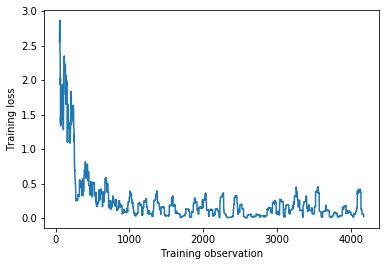

In [23]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore", category=RuntimeWarning)
    plt.plot([np.mean(loss_vec_train[i-50:i]) for i in range(len(loss_vec_train))]) 
    plt.xlabel('Training observation')
    plt.ylabel('Training loss')
    plt.show()

In [24]:
print('Test set accuracy over {} sentences:- '.format(len(texts_test)))
test_acc_all = []
for ix, t in enumerate(vocab_processor.transform(texts_test)):
    y_data = [[target_test[ix]]]    
    if (ix+1)%10==0:
        print('Test observation: ' + str(ix+1))    
    [[temp_pred]] = sess.run(prediction, feed_dict={x_data:t, y_target:y_data})   
    test_acc_temp = target_test[ix]==np.round(temp_pred)
    test_acc_all.append(test_acc_temp)   

print('\nOverall accuracy on test set (%): {}'.format(np.mean(test_acc_all)*100.0))

Test set accuracy over 1394 sentences:- 
Test observation: 10
Test observation: 20
Test observation: 30
Test observation: 40
Test observation: 50
Test observation: 60
Test observation: 70
Test observation: 80
Test observation: 90
Test observation: 100
Test observation: 110
Test observation: 120
Test observation: 130
Test observation: 140
Test observation: 150
Test observation: 160
Test observation: 170
Test observation: 180
Test observation: 190
Test observation: 200
Test observation: 210
Test observation: 220
Test observation: 230
Test observation: 240
Test observation: 250
Test observation: 260
Test observation: 270
Test observation: 280
Test observation: 290
Test observation: 300
Test observation: 310
Test observation: 320
Test observation: 330
Test observation: 340
Test observation: 350
Test observation: 360
Test observation: 370
Test observation: 380
Test observation: 390
Test observation: 400
Test observation: 410
Test observation: 420
Test observation: 430
Test observation: 440


In [25]:
number_of_correct_predicted_words = len(texts_test) - np.sum(test_acc_all)
print('Number of wrongly predicted texts on test set: {}'.format(number_of_correct_predicted_words))

Number of wrongly predicted texts on test set: 41


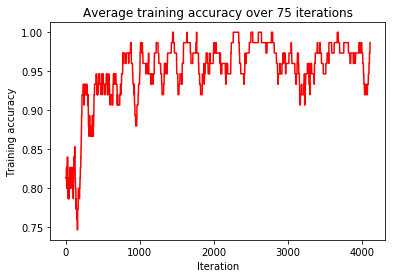

In [26]:
plt.plot(range(len(train_acc_avg)), train_acc_avg, 'r-', label='Training accuracy')
plt.title('Average training accuracy over 75 iterations')
plt.xlabel('Iteration')
plt.ylabel('Training accuracy')
plt.show()